<a href="https://colab.research.google.com/github/stutibimali/Webscrapping/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [2]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [3]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | The incoming and outgoing f...,5,2023-03-10,United Kingdom,True,incoming outgoing flight delayed french air tr...
1,✅ Trip Verified | Back in December my family ...,1,2023-03-10,Australia,True,back december family getting onto plane refuse...
2,✅ Trip Verified | As usual the flight is dela...,1,2023-03-10,United Kingdom,True,usual flight delayed week already hour held bu...
3,✅ Trip Verified | A short BA euro trip and thi...,1,2023-03-09,United Kingdom,True,short ba euro trip ba excel clean aircraft goo...
4,Not Verified | We are flying Business class f...,8,2023-03-08,United States,False,verified flying business class flight premium ...


##What is the average overall rating given for British Airways?

In [4]:
df.stars.mean()

4.438

## What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

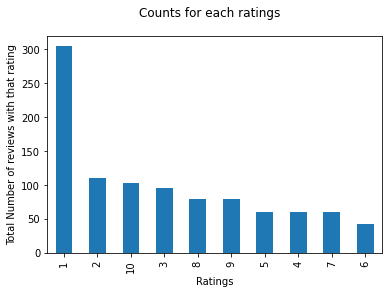

In [5]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [6]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [7]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [8]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [9]:
df_ratings

,Stars,total_counts,pct_values
0,1,305,30.5
1,2,111,11.1
2,10,104,10.4
3,3,96,9.6
4,8,80,8.0
5,9,80,8.0
6,5,61,6.1
7,4,60,6.0
8,7,60,6.0
9,6,43,4.3


Text(0.5, 1.0, 'Counts for each ratings')

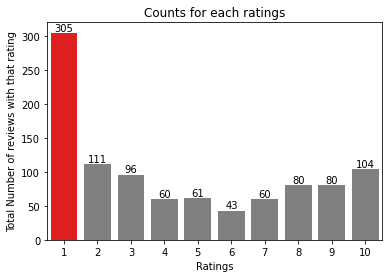

In [10]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [11]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

52 unique countries


## Which country most review comes from?

In [12]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [13]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

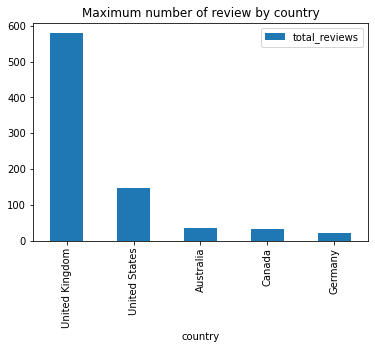

In [14]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

## Which country provided on average highest ratings?

In [15]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [16]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

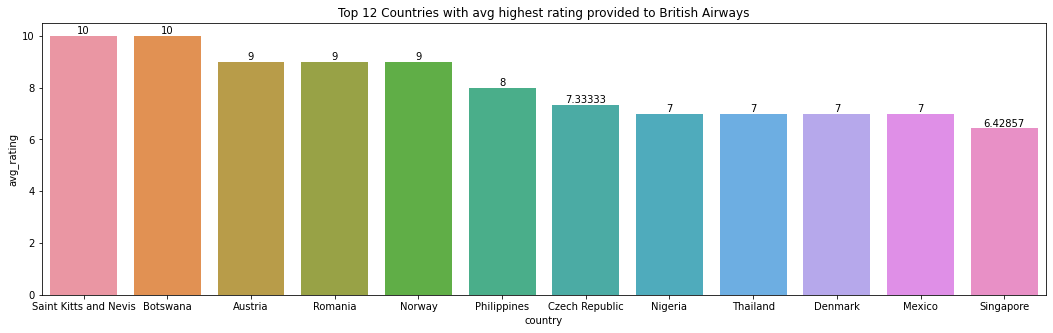

In [17]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

## **Time Series Analysis**

In [18]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [19]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


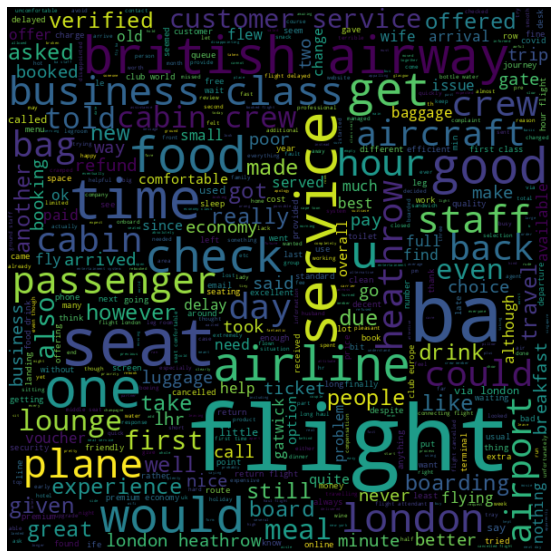

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

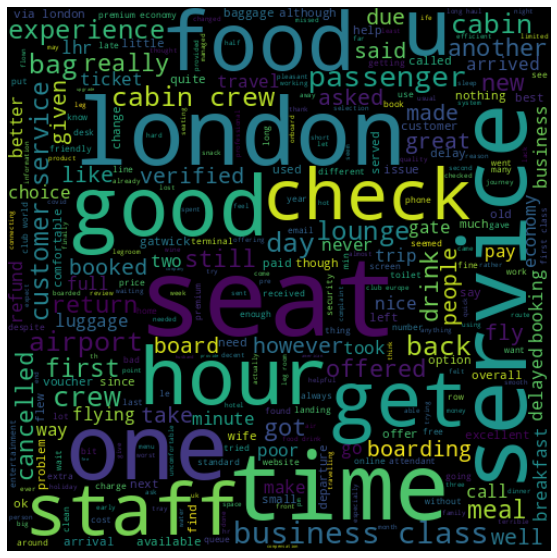

In [22]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Word Frequency

In [23]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'food'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'cabin'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'check'),
  Text(12, 0, 'customer'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'day'),
  Text(15, 0, 'economy'),
  Text(16, 0, 'boarding'),
  Text(17, 0, 'meal'),
  Text(18, 0, 'bag'),
  Text(19, 0, 'experience')])

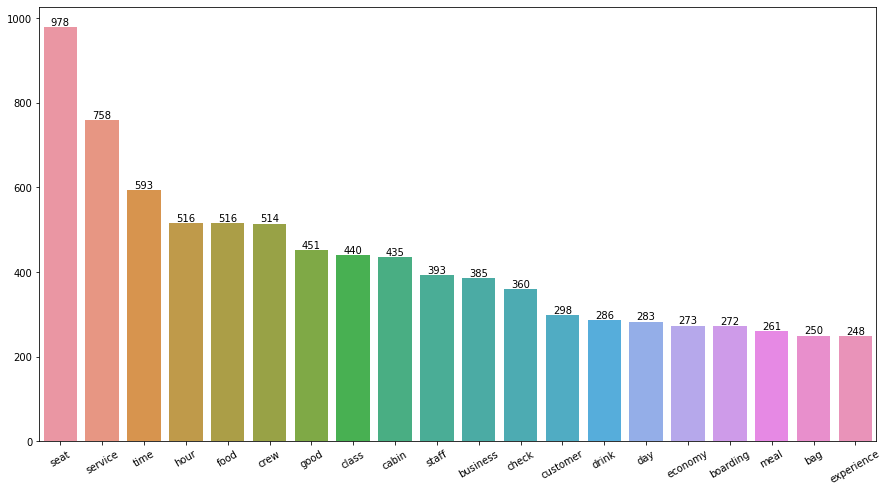

In [24]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

## Word Frequency with N-gram

<AxesSubplot:>

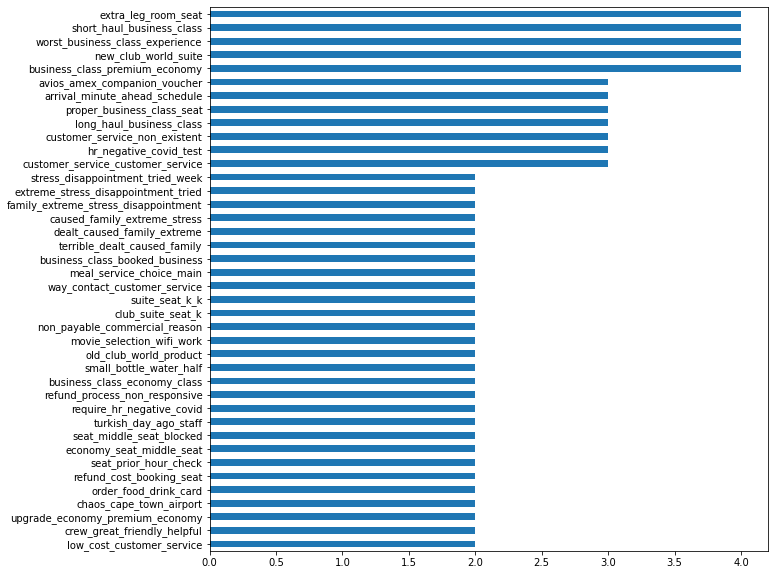

In [25]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [26]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

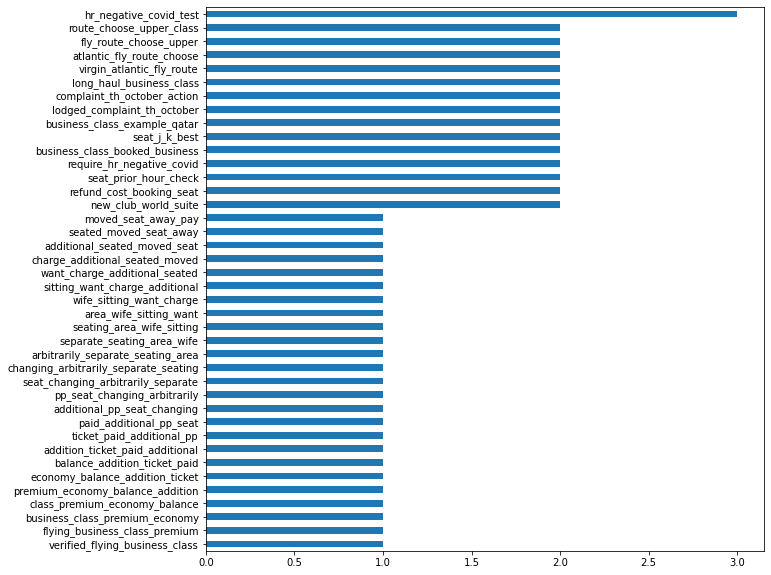

In [27]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

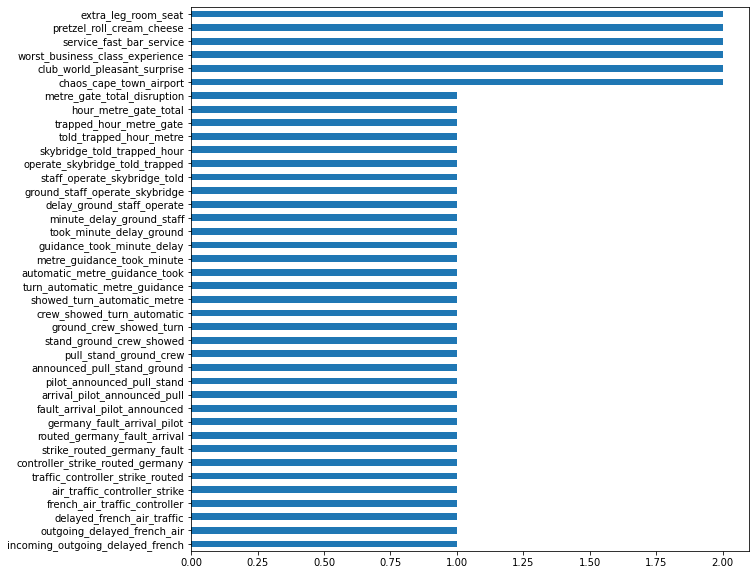

In [28]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

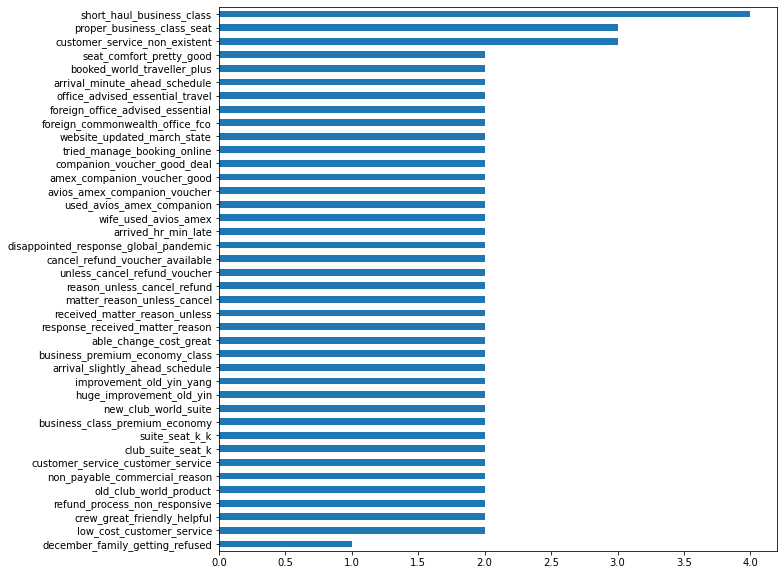

In [29]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

## textblob library to define if the text is negative or positive and to what extent



In [30]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [31]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

1000 number of reviews between -0.2 and 0.2 polarity score
1000 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

## VADER algorihtm by nltk library to find positive negative


In [34]:
%%capture
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [35]:
df.label.value_counts()

 1    602
-1    359
 0     39
Name: label, dtype: int64

## Topic Modeling with NDA

In [40]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [41]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [42]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,79.2,flight,227.3,flight,765.9,seat,32.7,british,9.0,flight,520.8,seat,497.8,flight,45.5
1,ba,65.9,food,112.0,ba,439.6,staff,23.5,airway,7.8,ba,328.6,flight,391.9,bag,41.4
2,one,54.4,seat,110.2,hour,250.9,ba,20.3,austin,5.2,crew,274.1,class,247.1,crew,39.6
3,time,50.2,service,108.0,customer,231.1,business,15.8,fco,5.1,good,266.2,ba,244.6,cabin,38.3
4,seat,39.7,economy,96.8,london,211.4,make,14.6,nice,4.8,service,248.4,business,204.1,seat,29.1
5,people,35.1,drink,91.5,day,209.8,service,14.5,travel,4.8,seat,243.0,service,159.8,ba,24.7
6,check,34.3,london,84.7,service,193.2,london,14.4,airline,4.2,food,228.0,cabin,144.7,london,23.5
7,passenger,28.4,meal,81.7,told,179.1,hour,14.0,partner,4.1,time,199.2,london,143.5,service,23.5
8,plane,25.5,ba,74.3,airway,165.3,class,13.4,every,4.0,cabin,179.1,food,142.2,passenger,21.0
9,london,21.0,premium,70.8,british,162.8,passenger,13.2,away,3.9,london,166.8,time,127.7,would,20.2


## Topic Modeling with NMF

In [43]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.06464194, 0.01457269],
       [0.10267791, 0.0846858 ],
       [0.05217261, 0.01071514],
       ...,
       [0.12177514, 0.17747071],
       [0.00570992, 0.18168714],
       [0.12375731, 0.        ]])

In [44]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [45]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,22.7,seat,10.7
1,ba,8.4,ba,5.8
2,hour,5.3,class,4.5
3,london,4.4,food,4.0
4,time,4.2,business,4.0
5,service,4.0,service,3.8
6,day,3.9,cabin,3.8
7,airway,3.6,crew,3.6
8,would,3.6,good,3.5
9,british,3.6,economy,3.3
